## Домашнее задание 3 (10 баллов)

## НИУ ВШЭ, 2024-25 учебный год

## Формат сдачи

Сам ноутбук называйте в формате hw-03-USERNAME.ipynb, где USERNAME — ваши фамилия и имя. Файл надо будет сдать в anytask.

## О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn, а также познакомитесь с plotly.

EDA - важный этап работы с данными. Именно в процессе EDA вы можете выяснить особенности датасета, найти зависимости в данных, протестировать гипотезы о взаимосвязях признаков и целевой переменной. В реальности вы сами будете определять, что и как проверять в рамках EDA, однако в данной работе гипотезы будут выдвинуты за вас автором задания. Также и типы графиков, которые вы будете использовать уже предопределены за вас. Выполняя задания по визуализациям, обращайте внимание на референсные картинки, которые были оставлены авторами. Они показывают, какой примерно результат от вас ожидается.

Это задание будет включать в себя построение некоторого количества графиков, потому вот основные правила, в соответствии с которыми графики должны быть оформлены:
1. Любой график всегда имеет название.
2. Оси у графика подписаны (исключение - график делит название оси с соседним).
3. Подписи делаются на одном языке (либо английский, либо русский), но не на их смеси.
4. Если вы выводите несколько графиков, то они размещаются в рамках одного объекта matplotlib.pyplot.figure. Вы не выводите графики последовательно, а смотрите, как их разместить сразу все за раз.
5. Отдельные графики (если графиков на картинке больше 1) также имеют свои названия.
6. Если на графике есть несколько различных объектов, то для их различения используется легенда. Помещайте легенду в место, где она в наименьшей мере мешает восприятию самого графика.
7. Если есть легенда, то она должна иметь навание, а также ее содержание должно быть адекватными (пожалейте проверяющих, они не хотят разбирать, а к чему относится зеленая линия, которая на легенде помечена меткой "0").
8. Используйте цветовые гаммы, чтобы объекты на графиках отличались цветом.
9. Текст на визуализации должен быть читаем. Если вы вывели названия категорий в качестве подписей на оси Х, а эти названия наезжают друг на друга, то вам нужно что-то с этим сделать. Нечитаемый или плохо читаемый (очень маленький, невероятно огромный) текст ведет к снижению баллов.

При работе с табличными данными используйте функционал [style](https://pandas.pydata.org/docs/user_guide/style.html#Builtin-Styles), чтобы визуально выделять необходимые элементы.

В этом задании будут оцениваться ваши развернутые комментарии, размышления и выводы (по построенным графикам): не скупитесь на них, но следите, чтобы выводы не были поверхностными и очевидными.

*Тут правило про плагиат, которое вам итак известно - обнуляются все работы, которые подозреваются в некорректных заимствованиях!* Помните, что просто скопировать код из интернета и указать источник - это не ваша самостоятельная работа, а автора кода. Измените хоть что-нибудь в коде.

## О данных

Будем работать с [датасетом физической активности](https://www.kaggle.com/datasets/uciml/human-activity-recognition-with-smartphones).

В этом датасете собраны данные 30 человек, выполняющих различные действия со смартфоном на поясе. Данные записывались с помощью датчиков (акселерометра и гироскопа) в этом смартфоне. Были зафиксированы: "3-осевое линейное ускорение" (_tAcc-XYZ_) и "3-осевая угловая скорость" (_tGyro-XYZ_).

1. Все сигналы отсортированы по времени, пропущены через фильтр шума.
2. Все наблюдения были разделены на окна по 128 сигналов в каждом, причем окна пересекаются на 50% (грубо говоря, с 1 по 128 сигнал в 1 окно, с 64 до 192 сигнала - во 2 окно и так далее). То есть каждое окно покрывает 2.56 секунды данных (два шага человека при ходьбе, учитывая медленную походку пожилых людей).
3. Линейное ускорение было разделено на две составляющие (с помощью низкочастотного фильтра): ускорение самого тела, а также гравитационная составляющая. Будем называть их ускорением тела и гравитационным ускорением.
4. К получившимся окнам применяли различные функции для получения следующих показателей:
    - max
    - min
    - mad (median)
    - mean
    - std
    - skewness (коэффициент асимметричности распределения признака в окне)
    - etc. (подробнее, на сколько это возможно, указано в [самой статье](https://www.esann.org/sites/default/files/proceedings/legacy/es2013-84.pdf))
5. Величина (magnitude) сигнала также определялась через евклидову норму всех значений из вектора для одного окна.
6. К окнам было применено преобразование Фурье, чтобы получить частоты. Из частот были извелченыте же показатели, плюс новые:
    - bandsEnergy (энергия частотного интервала)
7. Были посчитаны углы между векторами соответствующих окон.
8. Для ускорений были посчитаны производные - рывки, к которым применялись те же функции.

Итог: в датасете каждый признак - это какая-то операция над вектором из 128 чисел, которые соответствуют замерам определенного человека занятого какой-то активностью на протяжении 2.56 секунд.

Как читать названия признаков? Примеры:
- `tBodyAccMag-mean()` - это вектор ускорений тела (без гравитационной составляющей этого ускорения), из которого взяли евклидову норму, а затем усреднили, чтобы получить скаляр
- `fBodyAcc-bandsEnergy()-1,8.2` - это вектор ускорения тела, к которому применили преобразование Фурье, преобразовав его в вектор частот, а затем посчитали на этом векторе энергию данного частотного интервала в определенном диапазоне частот (в данном случае 1 - 8.2)
- `angle(X,gravityMean)` - это угол между осью Х и вектором усредненных значений гравитационного ускорения из соответствующего окна

Вероятно, сначала покажется сложным, но мы разберемся с некоторыми признаками в отдельности и вы сможете понять их смысл, уже исходя из фактических соотношений.

## Предобработка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
%autosave 120


Autosaving every 120 seconds


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train = pd.read_csv('/content/drive/MyDrive/IAD/3/train.csv')
test = pd.read_csv("/content/drive/MyDrive/IAD/3/test.csv")

In [4]:
train.shape

(7352, 563)

В датасете 563 признака, включая целевую переменную. Столько признаков нам не нужно. Мы за вас сделали подвыборку признаков для удобства работы с ними.

In [5]:
cols_subset = [
    'tBodyAccMag-mean()',  # усредненная величина ускорения тела
    'tBodyGyroJerk-mad()-X',  # медианная величина рывка тела по оси Х
    'tGravityAcc-min()-X',  # минимум гравитационной составляющей ускорения по оси Х
    'tBodyAcc-max()-X',  # максимальная величина ускорения тела по оси Х
    'fBodyAcc-bandsEnergy()-1,8.2',  # энергия ускорения тела в интервале частоты
    'angle(X,gravityMean)',  # угол между осью Х и усредненной гравитационной составляющей ускорения
    'angle(Y,gravityMean)',  # угол между осью Y и усредненной гравитационной составляющей ускорения
    'angle(Z,gravityMean)',  # угол между осью Z и усредненной гравитационной составляющей ускорения,
    'fBodyAcc-skewness()-X',  # асимметричность частоты ускорения тела по оси Х
    'subject',  # номер испытуемого
    'Activity',  # название вида деятельности (целевая переменная)
]

In [6]:
train = train[cols_subset]
test = test[cols_subset]
datasets = [train, test]
datasets_str = ['train', 'test']

In [7]:
def data_info(dataset):
    print("Первые строки датафрейма")
    display(dataset.head())
    print('\n\nПервичная информация')
    dataset.info()
    print('-' * 50)
    print('\n\n')

In [8]:
for data, name in zip(datasets, datasets_str):
    print(name)
    data_info(data)

train
Первые строки датафрейма


,tBodyAccMag-mean(),tBodyGyroJerk-mad()-X,tGravityAcc-min()-X,tBodyAcc-max()-X,"fBodyAcc-bandsEnergy()-1,8.2","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",fBodyAcc-skewness()-X,subject,Activity
0,-0.959434,-0.992165,0.977436,-0.934724,-0.993592,-0.841247,0.179941,-0.058627,0.142051,1,STANDING
1,-0.979289,-0.989876,0.984520,-0.943068,-0.998235,-0.844788,0.180289,-0.054317,-0.692541,1,STANDING
2,-0.983703,-0.987868,0.986770,-0.938692,-0.999388,-0.848933,0.180637,-0.049118,-0.727227,1,STANDING
3,-0.986542,-0.991241,0.986821,-0.938692,-0.999807,-0.848649,0.181935,-0.047663,-0.599118,1,STANDING
4,-0.992827,-0.992882,0.987434,-0.942469,-0.999806,-0.847865,0.185151,-0.043892,-0.676997,1,STANDING




Первичная информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tBodyAccMag-mean()            7352 non-null   float64
 1   tBodyGyroJerk-mad()-X         7352 non-null   float64
 2   tGravityAcc-min()-X           7352 non-null   float64
 3   tBodyAcc-max()-X              7352 non-null   float64
 4   fBodyAcc-bandsEnergy()-1,8.2  7352 non-null   float64
 5   angle(X,gravityMean)          7352 non-null   float64
 6   angle(Y,gravityMean)          7352 non-null   float64
 7   angle(Z,gravityMean)          7352 non-null   float64
 8   fBodyAcc-skewness()-X         7352 non-null   float64
 9   subject                       7352 non-null   int64  
 10  Activity                      7352 non-null   object 
dtypes: float64(9), int64(1), object(1)
memory usage: 631.9+ KB
---------------------------------------

,tBodyAccMag-mean(),tBodyGyroJerk-mad()-X,tGravityAcc-min()-X,tBodyAcc-max()-X,"fBodyAcc-bandsEnergy()-1,8.2","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",fBodyAcc-skewness()-X,subject,Activity
0,-0.866929,-0.910363,0.944461,-0.894088,-0.924705,-0.720009,0.276801,-0.057978,-0.571999,2,STANDING
1,-0.968961,-0.968614,0.944461,-0.894088,-0.997186,-0.698091,0.281343,-0.083898,-0.918176,2,STANDING
2,-0.976228,-0.983723,0.948704,-0.939260,-0.999083,-0.702771,0.280083,-0.079346,-0.384114,2,STANDING
3,-0.974325,-0.983995,0.947309,-0.938610,-0.999171,-0.698954,0.284114,-0.077108,-0.635581,2,STANDING
4,-0.975836,-0.988244,0.946221,-0.938610,-0.999355,-0.692245,0.290722,-0.073857,-0.507391,2,STANDING




Первичная информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tBodyAccMag-mean()            2947 non-null   float64
 1   tBodyGyroJerk-mad()-X         2947 non-null   float64
 2   tGravityAcc-min()-X           2947 non-null   float64
 3   tBodyAcc-max()-X              2947 non-null   float64
 4   fBodyAcc-bandsEnergy()-1,8.2  2947 non-null   float64
 5   angle(X,gravityMean)          2947 non-null   float64
 6   angle(Y,gravityMean)          2947 non-null   float64
 7   angle(Z,gravityMean)          2947 non-null   float64
 8   fBodyAcc-skewness()-X         2947 non-null   float64
 9   subject                       2947 non-null   int64  
 10  Activity                      2947 non-null   object 
dtypes: float64(9), int64(1), object(1)
memory usage: 253.4+ KB
---------------------------------------

### Задание 1 (0.5 балла)

Посмотрите на пропуски и дубли в данных train и test. Есть ли они? Если есть, напишите, с чем это может быть связано? Если нет, то просто напишите, что пропусков и/или дублей нет.

In [9]:
for data, name in zip(datasets, datasets_str):
    print(f"\n{name} пропуски")
    print(data.isna().sum())
    print(f"\n{name} дубликаты")
    print(data.duplicated().sum())
    print("-" * 100)


train пропуски
tBodyAccMag-mean()              0
tBodyGyroJerk-mad()-X           0
tGravityAcc-min()-X             0
tBodyAcc-max()-X                0
fBodyAcc-bandsEnergy()-1,8.2    0
angle(X,gravityMean)            0
angle(Y,gravityMean)            0
angle(Z,gravityMean)            0
fBodyAcc-skewness()-X           0
subject                         0
Activity                        0
dtype: int64

train дубликаты
0
----------------------------------------------------------------------------------------------------

test пропуски
tBodyAccMag-mean()              0
tBodyGyroJerk-mad()-X           0
tGravityAcc-min()-X             0
tBodyAcc-max()-X                0
fBodyAcc-bandsEnergy()-1,8.2    0
angle(X,gravityMean)            0
angle(Y,gravityMean)            0
angle(Z,gravityMean)            0
fBodyAcc-skewness()-X           0
subject                         0
Activity                        0
dtype: int64

test дубликаты
0
---------------------------------------------------------

В данных нет пропусков и дубликатов

### Задание 2 (0.5 балла)

Выведите основные статистики данных: среднее, медиана, перцентили (0.25, 0.5, 0.75), минимум, максимум, стандартное отклонение. Посмотрите на таблицу и напишите, видите ли вы в ней что-нибудь интересное.

In [10]:
train.describe()

,tBodyAccMag-mean(),tBodyGyroJerk-mad()-X,tGravityAcc-min()-X,tBodyAcc-max()-X,"fBodyAcc-bandsEnergy()-1,8.2","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",fBodyAcc-skewness()-X,subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,-0.543884,-0.727735,0.678505,-0.468604,-0.847963,-0.489547,0.058593,-0.056515,-0.128562,17.413085
std,0.477653,0.315832,0.508656,0.544547,0.233633,0.511807,0.297480,0.279122,0.403686,8.975143
min,-1.000000,-0.999889,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-0.931208,1.000000
25%,-0.983282,-0.991595,0.804270,-0.936219,-0.999480,-0.812065,-0.017885,-0.143414,-0.486841,8.000000
50%,-0.883371,-0.950268,0.926693,-0.881637,-0.986582,-0.709417,0.182071,0.003181,-0.163271,19.000000
75%,-0.106892,-0.474625,0.965095,-0.017129,-0.764508,-0.509079,0.248353,0.107659,0.155112,26.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.478157,1.000000,1.000000,30.000000


In [11]:
test.describe()

,tBodyAccMag-mean(),tBodyGyroJerk-mad()-X,tGravityAcc-min()-X,tBodyAcc-max()-X,"fBodyAcc-bandsEnergy()-1,8.2","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",fBodyAcc-skewness()-X,subject
count,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000,2947.000000
mean,-0.559043,-0.735661,0.696878,-0.462063,-0.880361,-0.513923,0.074886,-0.048720,-0.154042,12.986427
std,0.439539,0.282074,0.502873,0.523916,0.160496,0.509205,0.324300,0.241467,0.392203,6.950984
min,-0.998936,-1.000000,-0.756774,-0.952357,-0.999989,-0.984195,-0.913704,-0.949228,-1.000000,2.000000
25%,-0.978433,-0.989078,0.836787,-0.934447,-0.999330,-0.829722,0.022140,-0.098485,-0.497070,9.000000
50%,-0.861830,-0.914698,0.934930,-0.852659,-0.979336,-0.729648,0.181563,-0.010671,-0.202050,12.000000
75%,-0.149596,-0.486423,0.970871,-0.009965,-0.799113,-0.545939,0.260252,0.092373,0.140254,18.000000
max,0.479547,0.117606,0.996148,0.786436,0.048730,0.833180,1.000000,0.973113,0.960367,24.000000


In [12]:
train.describe()-test.describe()

,tBodyAccMag-mean(),tBodyGyroJerk-mad()-X,tGravityAcc-min()-X,tBodyAcc-max()-X,"fBodyAcc-bandsEnergy()-1,8.2","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",fBodyAcc-skewness()-X,subject
count,4405.000000,4405.000000,4405.000000,4405.000000,4405.000000,4405.000000,4405.000000,4405.000000,4405.000000,4405.000000
mean,0.015159,0.007926,-0.018373,-0.006541,0.032397,0.024376,-0.016293,-0.007795,0.025480,4.426658
std,0.038115,0.033758,0.005783,0.020630,0.073137,0.002602,-0.026820,0.037655,0.011483,2.024159
min,-0.001064,0.000111,-0.243226,-0.047643,-0.000011,-0.015805,-0.086296,-0.050772,0.068792,-1.000000
25%,-0.004849,-0.002518,-0.032517,-0.001772,-0.000150,0.017657,-0.040024,-0.044930,0.010229,-1.000000
50%,-0.021541,-0.035570,-0.008237,-0.028978,-0.007246,0.020230,0.000509,0.013852,0.038779,7.000000
75%,0.042704,0.011798,-0.005776,-0.007164,0.034605,0.036860,-0.011899,0.015286,0.014858,8.000000
max,0.520453,0.882394,0.003852,0.213564,0.951270,0.166820,-0.521843,0.026887,0.039633,6.000000


* Средние значения и стандартные отклонения в train и test наборах данных различаются незначительно, а значит, что тестовая выборка достаточно репрезентативна
* В целом, данные выглядят сбалансированными

### Задание 3 (0.5 балла)

Данные сбалансированы? У вас есть 6 категорий активности (целевая переменная). Если одна из категорий представлена большим количеством наблюдений, а остальные - нет, то это обстоятельство, о котором хотелось бы знать заранее. Гиперболизированный пример: представьте, что у вас 1000 наблюдений, разделенных на два класса, и только 5 принадлежат ко второму классу. Как учить модель на такой выборке? Есть сильное подозрение, что многие модели будут склонны вырождаться в константу. Отсюда и необходимость проверять баланс классов.

Выведите количество наблюдений для всех категорий активности в train и test. Посчитайте разницу в процентах между самой крупной категорией и самой маленькой (самая большая категория - это 100%). Если разница (округленная до ближайшего целого числа) не превышает 30%, то давайте для наших целей считать, что данные сбалансированы. Напишите, сбалансированы ли данные в train и test.

,train,test
Activity,,
LAYING,1407,537
STANDING,1374,532
SITTING,1286,491
WALKING,1226,496
WALKING_UPSTAIRS,1073,471
WALKING_DOWNSTAIRS,986,420


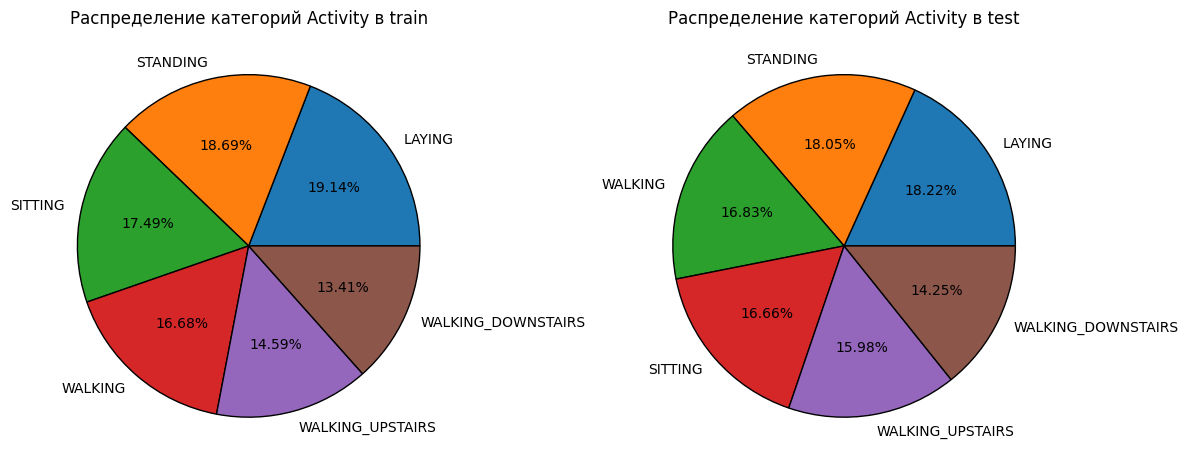

In [13]:
#Выводим количество экземпляров каждого класса
cat_train = train['Activity'].value_counts()
cat_test = test['Activity'].value_counts()
cat = pd.concat([cat_train, cat_test], axis=1)
cat.columns = ['train', 'test']
display(cat)
#pie для train
fig, axes = plt.subplots(1, 2, figsize=(12, 8))
train['Activity'].value_counts().plot.pie(
    autopct='%1.2f%%',
    wedgeprops={'edgecolor': 'black', 'linewidth': 1},
    ax=axes[0]
)
#pie для test
test['Activity'].value_counts().plot.pie(
    autopct='%1.2f%%',
    wedgeprops={'edgecolor': 'black', 'linewidth': 1},
    ax=axes[1]
)
axes[0].set_title('Распределение категорий Activity в train')
axes[0].set_ylabel('')
axes[1].set_title('Распределение категорий Activity в test')
axes[1].set_ylabel('')
plt.tight_layout()
plt.show()

Теперь посчитаем разницу между самой крупной категорией и самой маленькой

In [14]:
print(f"Разница между самой крупной и самой маленькой категорией в train: {round((cat['train'].max() - cat['train'].min()) / cat['train'].max() * 100)}%")
print(f"Разница между самой крупной и самой маленькой категорией в train: {round((cat['test'].max() - cat['test'].min()) / cat['test'].max() * 100)}%")

Разница между самой крупной и самой маленькой категорией в train: 30%
Разница между самой крупной и самой маленькой категорией в train: 22%


Заметич, что разница не превышает 30%, а значи данные сбалансированы

### Задание 4 (0.5 балла)

Посчитайте корреляции всех признаков (включая таргет) со всеми другими. Какими получились значения? Есть идеи, почему так? Напишите ваши мысли.

In [15]:
round(train.corr(numeric_only=True),3)

,tBodyAccMag-mean(),tBodyGyroJerk-mad()-X,tGravityAcc-min()-X,tBodyAcc-max()-X,"fBodyAcc-bandsEnergy()-1,8.2","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",fBodyAcc-skewness()-X,subject
tBodyAccMag-mean(),1.000,0.899,0.370,0.960,0.698,-0.371,0.496,0.426,0.380,-0.074
tBodyGyroJerk-mad()-X,0.899,1.000,0.380,0.880,0.508,-0.382,0.479,0.381,0.266,-0.110
tGravityAcc-min()-X,0.370,0.380,1.000,0.380,0.239,-0.989,0.797,0.667,-0.262,-0.042
tBodyAcc-max()-X,0.960,0.880,0.380,1.000,0.613,-0.384,0.480,0.405,0.336,-0.056
"fBodyAcc-bandsEnergy()-1,8.2",0.698,0.508,0.239,0.613,1.000,-0.213,0.363,0.424,0.260,-0.037
"angle(X,gravityMean)",-0.371,-0.382,-0.989,-0.384,-0.213,1.000,-0.784,-0.644,0.266,0.026
"angle(Y,gravityMean)",0.496,0.479,0.797,0.480,0.363,-0.784,1.000,0.595,-0.046,-0.010
"angle(Z,gravityMean)",0.426,0.381,0.667,0.405,0.424,-0.644,0.595,1.000,-0.184,-0.099
fBodyAcc-skewness()-X,0.380,0.266,-0.262,0.336,0.260,0.266,-0.046,-0.184,1.000,0.020
subject,-0.074,-0.110,-0.042,-0.056,-0.037,0.026,-0.010,-0.099,0.020,1.000


Высокая корреляция
* tBodyAccMag-mean() и tBodyGyroJerk-mad()-X (0.899)
* tBodyAccMag-mean() и tBodyAcc-max()-X (0.960)
* tGravityAcc-min()-X и angle(X,gravityMean) (-0.989)
* angle(X,gravityMean) и angle(Y,gravityMean) (-0.784)

Похожие физические характеристики движений влияют на эти признаки поэтому их значения ведут себя схоже.

Поздравляем! Вы предобработали данные для максимально комфортного их последующего анализа. Теперь вы готовы приступить к Exploratory Data Analysis!

## Exploratory Data Analysis

### Задание 5 (0.5 балла)

Вы проверили основную информацию о данных и составили свое первое впечатление о них. Теперь визуализации.

Начнем рисовать графики с небольшой разминки. Выберите две любые математические функции (отличные от линейной) и нарисуйте их на одном графике. Подпишите каждый из графиков, чтобы было понятно, какие функции вы выбрали. Ниже будет пример.

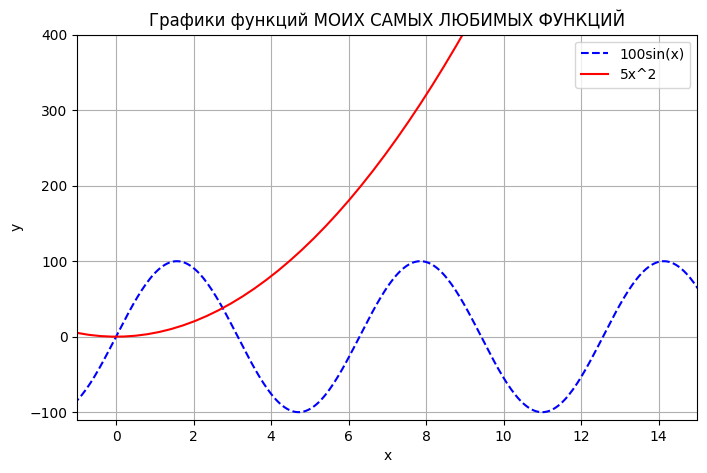

In [16]:
x1 = np.linspace(-np.pi, 6*np.pi, 400)
x2 = np.linspace(-5, 10, 50)
y1 = np.sin(x1) * 100
y2 = x2**2 * 5

plt.figure(figsize=(8, 5))
plt.plot(x1, y1, label="100sin(x)", linestyle='--', color='blue')
plt.plot(x2, y2, label="5x^2", color='red')
plt.xlim(-1, 15)
plt.ylim(-110, 400)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Графики функций МОИХ САМЫХ ЛЮБИМЫХ ФУНКЦИЙ")
plt.legend()
plt.grid()
plt.show()


### Задание 6 (0.5 балла)

Ранее мы уже проверили сбалансированность данных по разным категориям активностей в train и test сетах. Теперь визуализируйте количество сэмплов в каждой из категорий отдельно для train и test сетов, как в примере ниже. Проследите, чтобы порядок категорий слева и справа был одинаков. Иначе не очень удобно их сравнивать (когда они в разных местах двух графиков). Также заметьте, что в примере ось Х в одинаковом масштабе, что тоже удобно для сравнения.

Вам может пригодиться:
- plt.barh или ax.barh

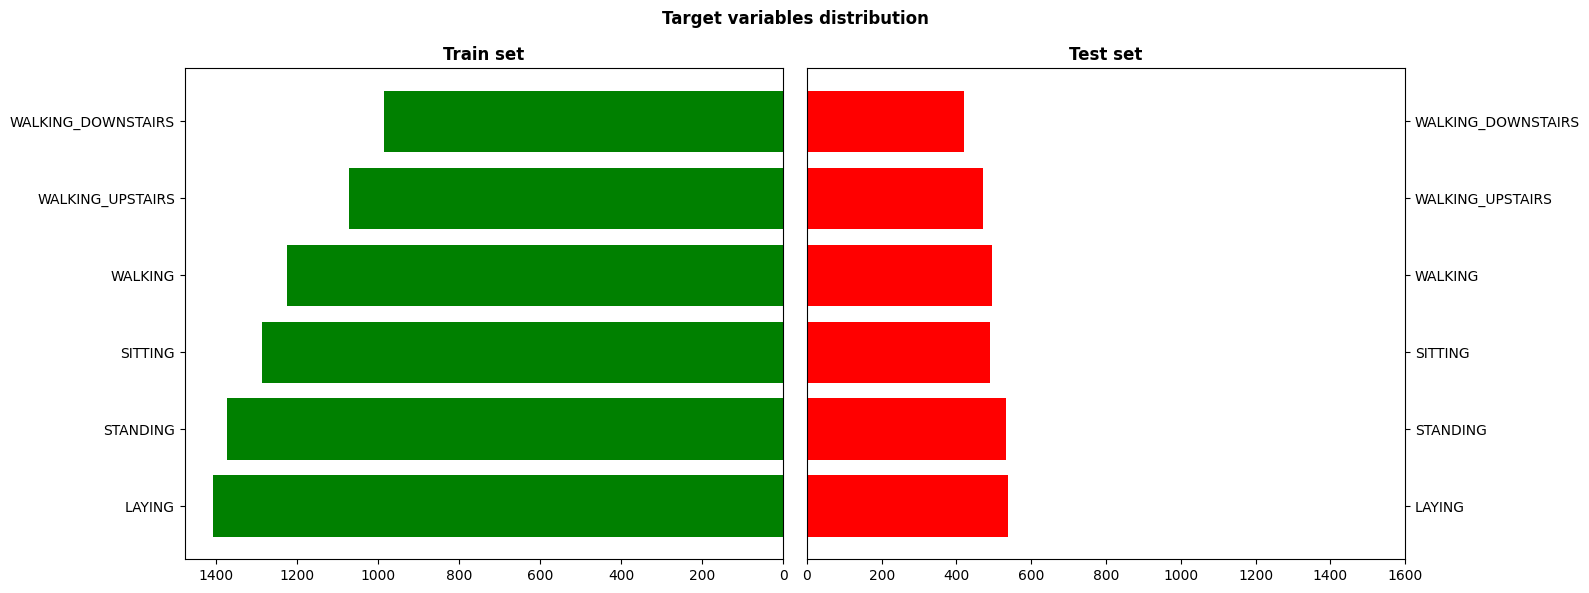

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

axes[0].barh(cat.index, cat['train'], color='green')
axes[0].set_title('Train set', fontweight='bold')
axes[0].invert_xaxis()

axes[1].barh(cat.index, cat['test'], color='red')
axes[1].set_title('Test set', fontweight='bold')
axes[1].yaxis.tick_right()

plt.xlim(0, 1600)
fig.suptitle('Target variables distribution', fontweight='bold')
plt.tight_layout()
plt.show()

Правда на таких графиках проще проверять баланс классов таргета?)

DA

### Задание 7 (0.5 балла)

Ранее вы выводили таблицу корреляций. Однако просто таблица корреляций не очень удобна для анализа. Что, если признаков было бы больше? Визуализируйте heatmap корреляций. Подпишите значения корреляций, округленные до 2 знаков после запятой, на графике и оставьте только те значения, которые по модулю не меньше 0.5. Будем считать такие корреляции существенными. Если будете брать код из семинарского ноутбука, то поменяйте в нем что-нибудь, например, цветовую гамму, иначе проверяющий будет карать :)

Какой признак стоит исключить из рассмотрения корреляций? Напишите его название, а также причину, почему нет смысла его рассматривать.

Вам может пригодиться:
- sns.heatmap
- методы get_text и set_text у атрибута texts графика

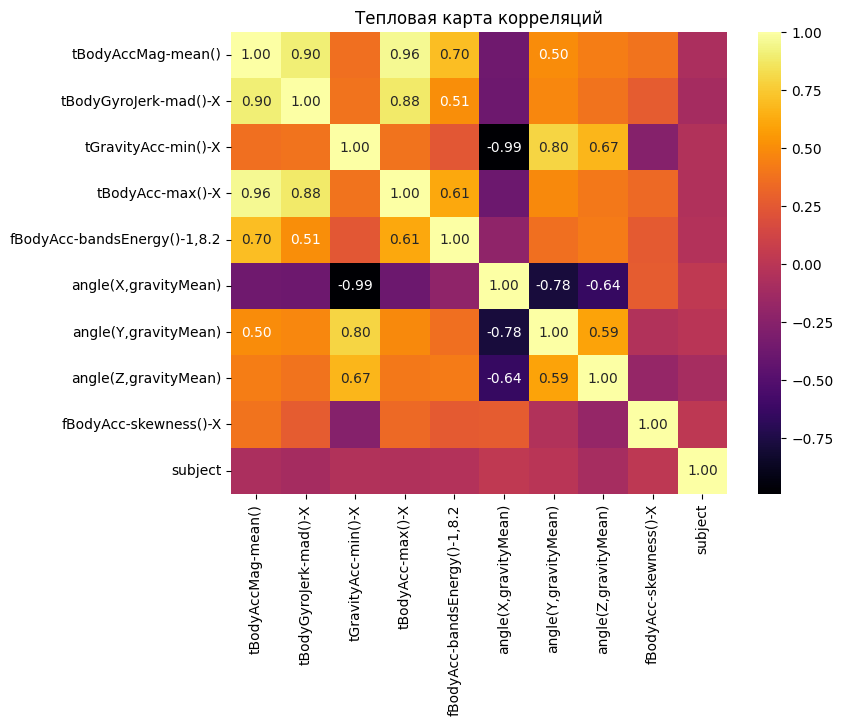

In [18]:
plt.figure(figsize = (8, 6))
ax = sns.heatmap(train.corr(numeric_only = True), cmap="inferno", annot=True, fmt="0.2f")
for t in ax.texts:
    if float(t.get_text()) >= 0.5 or float(t.get_text()) <= -0.5:
        t.set_text(t.get_text())
    else:
        t.set_text("")
plt.title("Тепловая карта корреляций")
plt.show()

Из рассмотрения стоит удалить признак `'tGravityAcc-min()-X'` или `'angle(X,gravityMean)'` т.к их корреляция очень высскоая 0.99, что может плохо сказаться на линейных моделях

### Задание 8 (0.5 балла)

Для начала будем стрелять из пушки по воробьям. Выведите pairplot по всем данным train сета. Напишите, заметили ли вы в нем что-нибудь интересное, чего не было в таблицах и графиках ранее, а также сообщите, было ли вам удобно анализировать 100 графиков.

In [19]:
sns.pairplot(train)
plt.title('Много много всего(')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

Очень неудобно анализировать и если честно не заметил ничего

### Задание 9 (1 балл)

Окей. Смотреть на все сразу не очень удобно. Кажется, нужно смотреть на признаки в отдельности и искать в них инсайты.

Попробуем проверить гипотезу. Отобразите плотность распределения (kde) `tBodyAccMag-mean()` для каждой из активностей, как в примере ниже. Видите закономерность? Можно ли поделить все активности на две группы? Если да, то проведите вертикальную линию, которая визуально неплохо разделяет эти группы.

Давайте первую группу называть статическими активностями, а вторую - динамическими.

Посчитайте, какую долю правильных ответов дает ваша вертикальная линия для разделения именно этих двух групп. С чем может быть связан полученный вами результат? Предположите логическое обоснование (почему именно данный признак так хорошо/плохо разделяет группы активностей).

Вам может пригодиться:
- sns.kdeplot

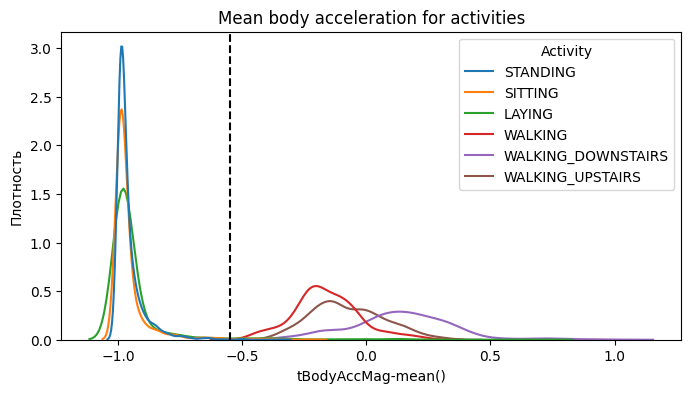

In [20]:
plt.figure(figsize=(8, 4))
sns.kdeplot(data=train, x='tBodyAccMag-mean()', hue='Activity')
plt.axvline(x=-0.55, color='black', linestyle='--')
plt.xlabel('tBodyAccMag-mean()')
plt.ylabel('Плотность')
plt.title('Mean body acceleration for activities')
plt.show()

Разделим данные на 2 группы по порогу `-0.55`

Давайте первую группу называть статическими активностями, а вторую - динамическими

In [21]:
train.shape

(7352, 11)

In [22]:
train['new_activity'] = train['tBodyAccMag-mean()'].apply(lambda x: 'static' if x < -0.55 else 'dynamic')
def true_activity(x):
    if x in ["STANDING", "LAYING", "SITTING"]:
        return 'static'
    return 'dynamic'
train['true_activity'] = train['Activity'].apply(true_activity)

In [23]:
train.head()

,tBodyAccMag-mean(),tBodyGyroJerk-mad()-X,tGravityAcc-min()-X,tBodyAcc-max()-X,"fBodyAcc-bandsEnergy()-1,8.2","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",fBodyAcc-skewness()-X,subject,Activity,new_activity,true_activity
0,-0.959434,-0.992165,0.977436,-0.934724,-0.993592,-0.841247,0.179941,-0.058627,0.142051,1,STANDING,static,static
1,-0.979289,-0.989876,0.984520,-0.943068,-0.998235,-0.844788,0.180289,-0.054317,-0.692541,1,STANDING,static,static
2,-0.983703,-0.987868,0.986770,-0.938692,-0.999388,-0.848933,0.180637,-0.049118,-0.727227,1,STANDING,static,static
3,-0.986542,-0.991241,0.986821,-0.938692,-0.999807,-0.848649,0.181935,-0.047663,-0.599118,1,STANDING,static,static
4,-0.992827,-0.992882,0.987434,-0.942469,-0.999806,-0.847865,0.185151,-0.043892,-0.676997,1,STANDING,static,static


In [24]:
print(round((train['new_activity']==train['true_activity']).sum()/train.shape[0] * 100, 2))

99.09


Такое разделение по группам верно определяет физическую активность потому что признак `'tBodyAccMag-mean()'` характериует ускорение тела, а если ускорения нет то, то можно точно определить активность динамическая или статическая

### Задание 10 (0.5 балла)

Поздравляем, вы проверили первую гипотезу в процессе EDA. Однако нам бы хотелось уметь не группы разделять, а каждый отдельный вид активности. Попробуйте нарисовать "ящики с усами" для `angle(X,gravityMean)` с разделением по разным видам активности на данных train. Можно ли сделать какой-то вывод по полученной визуализации? Проанализируйте и проинтерпретируйте полученные картинки (если заметили какую-то особенность, может какая-то категория значительно выделяется, то предположите, почему так могло произойти).

Вам может пригодиться:
- sns.boxplot

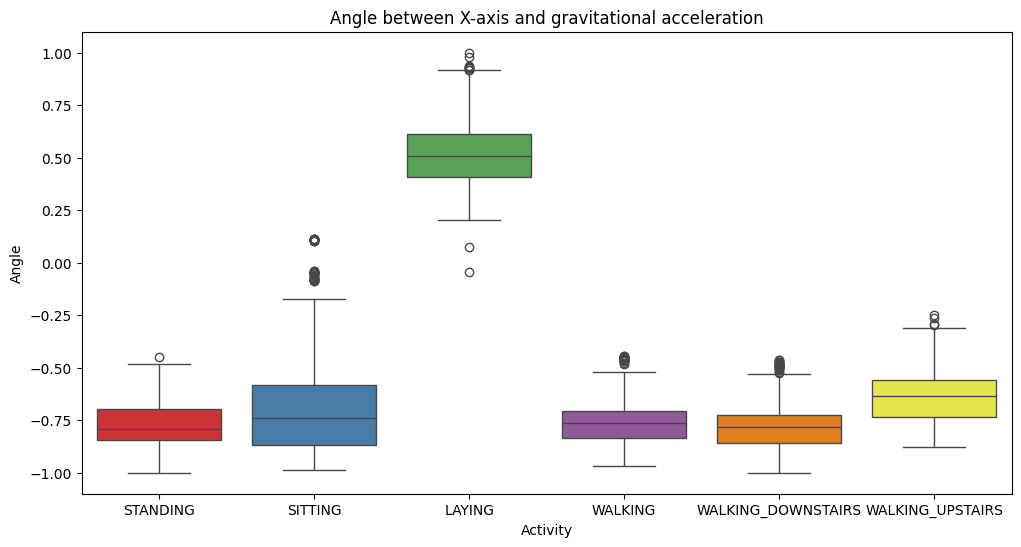

In [25]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Activity', y='angle(X,gravityMean)', data=train, palette='Set1')
plt.title('Angle between X-axis and gravitational acceleration')
plt.suptitle('')
plt.ylabel('Angle')
plt.xlabel('Activity')
plt.show()

Значение угла характеризуется активностью
* 1 группа: STANDING, WALKING, WALKING_DOWNSTAIRS подразумевает положение тела вертикально
* 2 группа: LAYING подразумевает положение тела горизонтально
* 3 группа: SITTING и WALKING_UPSTAIRS имеет межквартильный размах (Ящик шире) больше чем у первой группы, т.к при этих активностях тело отклоняется больше от гирозинтального положения чем во время активностей из 1 группы

### Задание 11 (0.5 балла)

Посмотрим теперь на `tBodyAcc-max()-X`. Визуализируйте скрипичные диаграммы для этого признака с разделением по активностям на всем train. Кажется логичным, что максимальное ускорение в моменте для разных активностей будет различаться. Однако есть ли активность, которая будет выделяться? Если да, то предложите объяснение, почему эта активность выделяется.

Вам может пригодиться:
- sns.violinplot

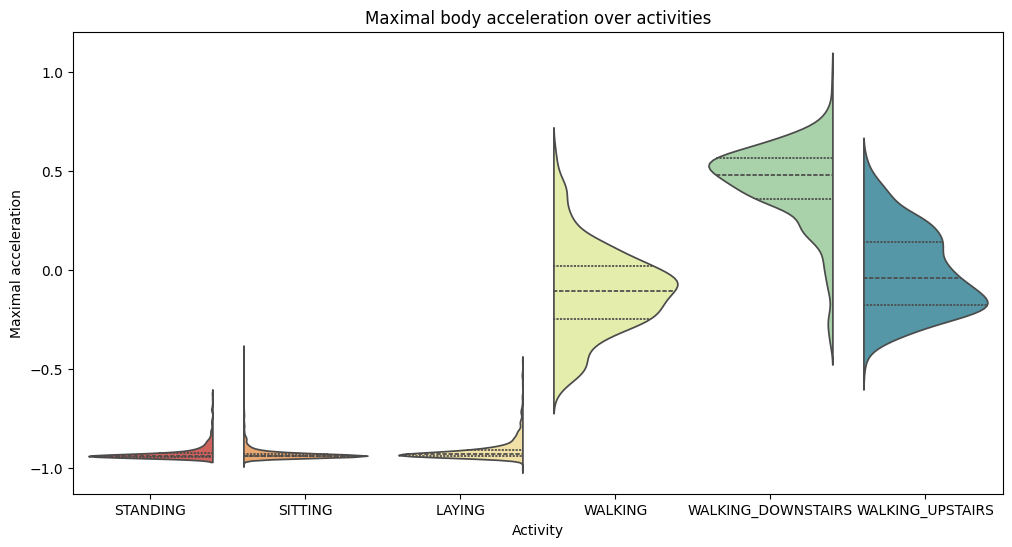

In [26]:

plt.figure(figsize=(12, 6))
sns.violinplot(data=train, x='Activity', y='tBodyAcc-max()-X',
               palette="Spectral", hue='Activity', split = True, inner = 'quart')
plt.title('Maximal body acceleration over activities')
plt.ylabel('Maximal acceleration')
plt.xlabel('Activity')
plt.show()

#'tBodyAcc-max()-X',  # максимальная величина ускорения тела по оси Х

"WALKING_DOWNSTAIRS" выделяется, потому что при спуске тело получает дополнительное ускорение из-за силы тяжести

### Задание 12 (1 балл)

Вы уже можете с довольно хорошим качеством выделить две категории активности из шести. Продолжим.

Ранее уже упоминалось разделение на две группы активностей: статические и динамические. Пришла пора разделить датасет train на две части. Сделайте это! Теперь на одной картинке покажите распределения `fBodyAcc-bandsEnergy()-1,8.2` для динамичных активностей (`boxenplot` - немного измененый "ящик с усами") и `angle(Y,gravityMean)` для статических - тут хватит и простой гистограммы (прямо, как в примере ниже). Можно ли выделить еще какие-то активности? Если да, напишите, какие активности на 1 и 2 графиках выделяются.

Вам может пригодиться:
- plt.subplots или matplotlib.gridspec (заметили, что один график больше другого? попробуйте сами так сделать - вам понравится...)
- sns.boxenplot
- sns.histplot

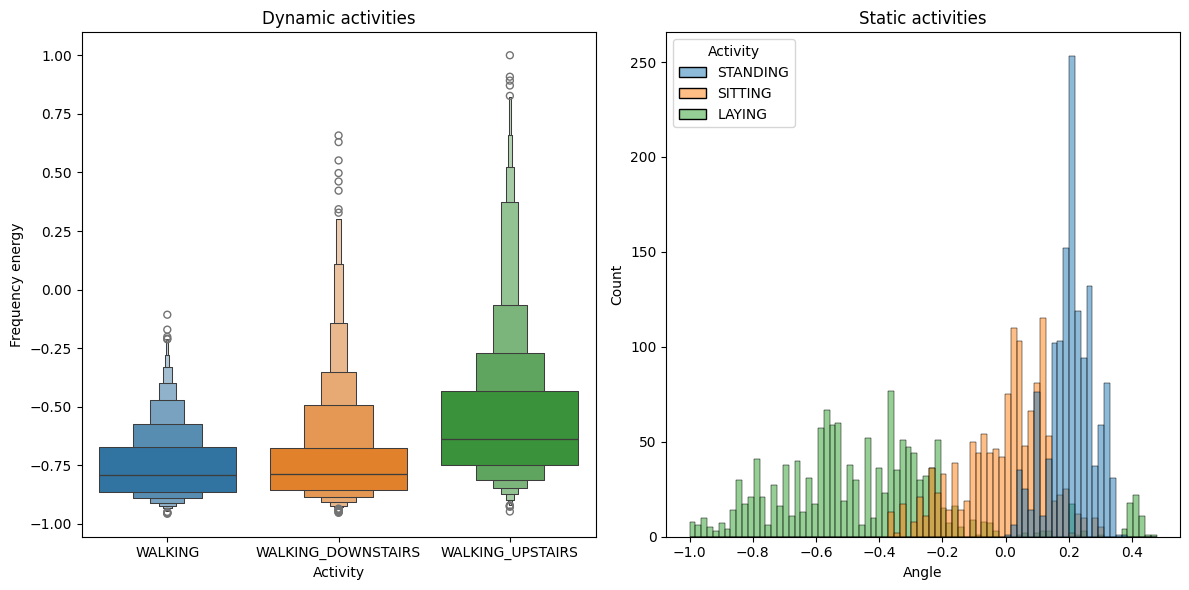

In [27]:
static = train[train['Activity'].isin(["STANDING", "LAYING", "SITTING"])]
dynamic = train[train['Activity'].isin(["WALKING", "WALKING_DOWNSTAIRS", "WALKING_UPSTAIRS"])]

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
sns.boxenplot(data=dynamic, x='Activity', y='fBodyAcc-bandsEnergy()-1,8.2',  hue='Activity', ax=axes[0])
axes[0].set_title('Dynamic activities')
axes[0].set_ylabel('Frequency energy')

sns.histplot(data=static, x='angle(Y,gravityMean)',bins = 80, hue='Activity', ax=axes[1])
axes[1].set_title('Static activities')
axes[1].set_xlabel('Angle')
plt.tight_layout()
plt.show()

* На 1 графике мы видим, что медиана и межкваритильный размах fBodyAcc-bandsEnergy()-1,8.2 WALKNIG и WALKING_DOWNSTAIRS почти одинаковые, в то время как у WALKING_UPSTAIRS Медиана заметно выше и 'ширина ящика' больше

Это связано с тем, что человеку нужно больше энергии, чтобы подниматься наверх, чем для того, чтобы просто ходить или спускаться

* На втором графике мы видим, что угол между вертикальной осью и ускорением тела у STANDING сосредоточен в окрестности 0.2, в то время как у двух других активностей признак может принимать более широкое множество значений

### Задание 13 (0.5 балла)

Не всегда жизнь будет такой легкой, а данные будут полностью или почти линейно разделимы в одному признаку (иначе чем бы занимались дата саентисты...). Часто данные вообще ни по одному признаку нельзя адекватно разделить (да и по комбинациям признаков тоже). Давайте попробуем взять не один признак, а целых два!

Рассмотрим только статические активности. Будет снова два графика сразу. На первом графике будет боксплот распределения `fBodyAcc-skewness()-X` по активностям. А на втором попробуем взять не все наблюдения данной группы активностей, а только их часть. Разделимы ли категории по `fBodyAcc-skewness()-X`? А если взять только те строки, где `fBodyAcc-skewness()-X < -0.376`, и теперь вывести боксплот распределения `angle(Y,gravityMean)` по разным активностям? Попробуйте и напишите, выделилась ли какая-то категория?

Вам может пригодиться:
- plt.subplots или matplotlib.gridspec
- sns.boxplot

In [28]:
filter = static[static['fBodyAcc-skewness()-X'] < -0.376]

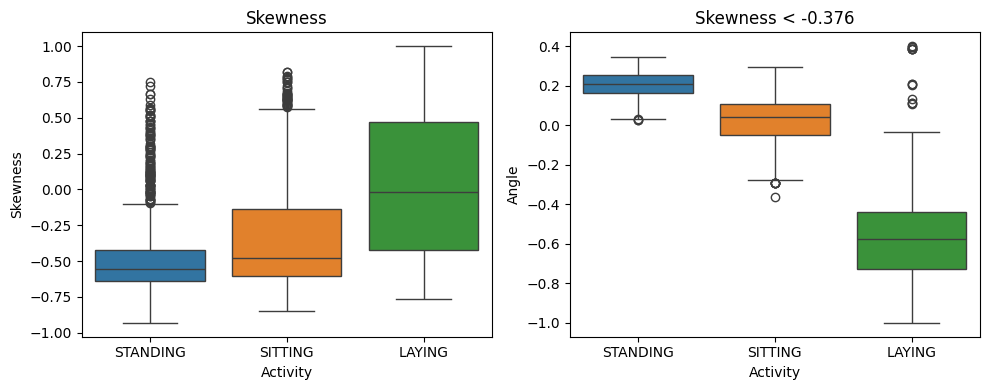

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

sns.boxplot(data=static, x='Activity', y='fBodyAcc-skewness()-X', hue = 'Activity', ax=axes[0])
axes[0].set_title('Skewness')
axes[0].set_ylabel('Skewness')

sns.boxplot(data=filter, x='Activity', y='angle(Y,gravityMean)', hue = 'Activity', ax=axes[1])
axes[1].set_title('Skewness < -0.376')
axes[1].set_ylabel('Angle')
axes[1].set_xlabel('Activity')

plt.tight_layout()
plt.show()

* На первом графике заметно, что медианные значения fBodyAcc-skewness()-X у STANDING и SITTING Примерно на одном уровне, а у LAYNG значительно выше, так же как LAYNG имеет значительно более широкий межквартильый размах

* На втором графике заметим, что "LAYING" явно выделяется — его значения оказались значительно ниже двух других активностей

Поздравляем, теперь вы на шажок ближе к тому, чтобы стать решающим деревом!

### Задание 14 (1 балл)

Вот и осталась лишь одна активность, которую мы никак не выделили. Попробуем и ее какими-то порогами отделить от всех остальных. Да, можно было бы сказать, что, раз уж мы выделили 5 из 6 категорий, то все остальное - это и есть последняя категория, но мы не идем легкими путями. Выделить оставшуюсь категорию с хорошим качеством не так уж и просто. Из доступных признаков, сначала посмотрите на распределение `tBodyAcc-max()-X` на динамических активностях (скрипичная диаграмма отлично подойдет).

А теперь спускаем вам порог `tBodyAcc-max()-X < 0.157`. Для таких строк постройте диаграмму рассеяния для признака `tGravityAcc-min()-X`. Да, получается неидеально, но это честная работа. Можно выбрать порог так, чтобы чисто из таблицы с динамическими активностями из строк, где `tBodyAcc-max()-X < 0.157`, выбрать по некоторому порогу для `tGravityAcc-min()-X` строки так, чтобы доля правильных ответов на оставшейся категории была не меньше 83%!

Вам может пригодиться:
- plt.subplots или matplotlib.gridspec
- sns.violinplot
- sns.swarmplot (иногда лучше подходит, чем просто sns.scatterplot)

Обратите внимание, что подписи к осям можно убирать методами plt. Например, если у вас общее название для оси Y для обоих графиков, то можно не подписывать ось Y у второго графика.

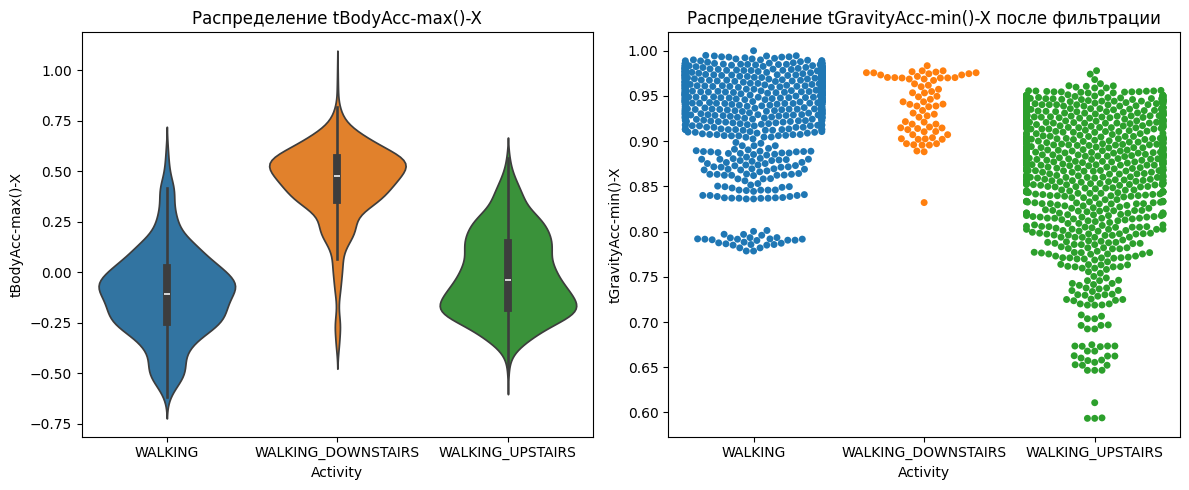

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.violinplot(x="Activity", y="tBodyAcc-max()-X", data=dynamic, hue = 'Activity', ax=axes[0])
axes[0].set_title("Распределение tBodyAcc-max()-X")
axes[0].set_ylabel("tBodyAcc-max()-X")

dynamic_filtered = dynamic[dynamic["tBodyAcc-max()-X"] < 0.157]

sns.swarmplot(x="Activity", y="tGravityAcc-min()-X", data=dynamic_filtered, hue = 'Activity', ax=axes[1])
axes[1].set_title("Распределение tGravityAcc-min()-X после фильтрации")
axes[1].set_xlabel("Activity")
axes[1].set_ylabel("tGravityAcc-min()-X")

plt.tight_layout()
plt.show()

In [31]:
# Подберем порог, при котороми из таблицы с динамическими активностями из строк, где tBodyAcc-max()-X < 0.157,
# выбрать по некоторому порогу для tGravityAcc-min()-X строки так,
# чтобы доля правильных ответов на оставшейся категории была не меньше 83%
best_threshold = None
best_accuracy = 0
thresholds = np.linspace(1, 0, 100)
for threshold in thresholds:
    res = dynamic_filtered[dynamic_filtered["tGravityAcc-min()-X"] < threshold]
    correct_predictions = res["Activity"].value_counts(normalize=True).max()
    if correct_predictions >= 0.83:
        best_threshold = threshold
        best_accuracy = correct_predictions
        break
print(res["Activity"].value_counts(normalize=True).idxmax())
print(f"Порог: {round(best_threshold, 2)}")
print(f"Достигнутая точность: {best_accuracy:.2%}")

WALKING_UPSTAIRS
Порог: 0.86
Достигнутая точность: 83.47%


### Задание 15 (0.5 балла)

Теперь попробуем более интерактивные графики. Установите библиотеку `plotly` (обычно `pip install plotly` или `conda install plotly`). Синтаксис очень похож на `seaborn`, но вот [документация для plotly.express](https://plotly.com/python-api-reference/plotly.express.html).

Сначала подготовим данные для визуализации. Будем считать t-SNE просто "черным ящиком", который принимает наши данные и проецирует их в двумерное или трехмерное пространство. Возможно, придется немного подождать.

In [32]:
!pip install plotly

In [33]:
train.drop(['new_activity','true_activity'], axis = 1, inplace=True)

In [34]:
%%time
from sklearn.manifold import TSNE
tsne = TSNE(random_state=666, n_components=2)
new = tsne.fit_transform(train.drop(['subject', 'Activity'], axis=1))
df_2_comp = pd.concat([
    pd.DataFrame(new, columns=['x', 'y']),
    train['Activity']
], axis=1)

tsne = TSNE(random_state=666, n_components=3)
new = tsne.fit_transform(train.drop(['subject', 'Activity'], axis=1))
df_3_comp = pd.concat([
    pd.DataFrame(new, columns=['x', 'y', 'z']),
    train['Activity']
], axis=1)

CPU times: user 4min 35s, sys: 516 ms, total: 4min 35s
Wall time: 4min 52s


Теперь нарисуйте scatter-график через `plotly.express` для `df_2_comp` с выделением цветами активностей. Красиво получилось? Видны скопления точек одного цвета? Можно разные активности отделить линиями на данном графике?

In [35]:
import plotly.express as px

In [36]:
# ʅ(◔౪◔ ) ʃ your code here
fig = px.scatter(df_2_comp,
                 x="x",
                 y="y",
                 color="Activity",
                 title="2D",
                 labels={"x": "t-SNE 1", "y": "t-SNE 2"},
                 opacity=0.7)
fig.show()

Мы не отстаем от трендов и тоже можем в 3D. Сейчас и вы научитесь (если еще не умеете). Нарисуйте scatter_3d-график через `plotly.express` для `df_3_comp` с выделением цветами активностей. Повращайте его. Нормально получилось? Есть ли какая-то структура у точек?

In [37]:
# (✧≖‿ゝ≖) your code here
fig = px.scatter_3d(df_3_comp,
                    x="x",
                    y="y",
                    z="z",
                    color="Activity",
                    title="3D",
                    labels={"x": "t-SNE 1", "y": "t-SNE 2", "z": "t-SNE 3"})
fig.show()


### Задание 16 (1 балл)

Мы сделали вам fit. Ваша очередь сделать predict. Допишите функцию, которая принимает на вход датафрейм с признаками, а выдает вектор из предсказаний - для каждой строки датафрейма вы определяете, к какому классу принадлежит объект. Рекомендуем сразу записывать из строками, а не кодировать в числа. Дальше фукнция `accuracy_score` выдаст вам долю правильных ответов.

Подсказка: вы уже отделили категории друг от друга по каким-то признакам. Воспользуйтесь этим знанием! Используя только проведенный вами анализ можно спокойно выбить не менее 75% на train и test! Если вы получите меньше 75%, то балл будет снижен. Авторское решение (на основе всех графиков выше) выбивает 81% и 77% на train и test соответственно. [Шпаргалка с готовыми идеями для такой задачи](https://rutube.ru/video/f884aa6ed5f94120b7304506042fe5bb/)

In [38]:
train.shape

(7352, 11)

In [114]:
def predict(df: pd.DataFrame):
    predictions = []
    for i, row in df.iterrows():
        if row['tBodyAccMag-mean()'] < -0.55:
            if row['angle(X,gravityMean)'] > 0:
                predictions.append('LAYING')
            elif 0.15 < row['angle(Y,gravityMean)'] < 0.4:
                predictions.append('STANDING')
            elif row['fBodyAcc-skewness()-X'] > -0.376:
                predictions.append('SITTING')
            elif row['angle(Y,gravityMean)'] < 0.1:
                predictions.append('SITTING')
            else:
                predictions.append('STANDING')
        else:
            if row['tBodyAcc-max()-X'] > 0.4:
                predictions.append('WALKING_DOWNSTAIRS')
            elif row['fBodyAcc-bandsEnergy()-1,8.2'] > -0.7:
                predictions.append('WALKING_UPSTAIRS')
            elif row['tBodyAcc-max()-X'] < 0.157:
                if row['tGravityAcc-min()-X'] < 0.86:
                    predictions.append('WALKING_UPSTAIRS')
                else:
                    predictions.append('WALKING')
            else:
                if row['fBodyAcc-bandsEnergy()-1,8.2'] > -0.25:
                    predictions.append('WALKING_UPSTAIRS')
                elif row['fBodyAcc-bandsEnergy()-1,8.2'] < -0.25:
                    predictions.append('WALKING_DOWNSTAIRS')
                else:
                    predictions.append('WALKING')

    return np.array(predictions)

def accuracy_score(y_true, y_pred) -> float:
    y_true = np.asarray(y_true).reshape(-1, 1)
    y_pred = np.asarray(y_pred).reshape(-1, 1)
    return (y_true == y_pred).mean()

In [115]:
train_preds = predict(train)
test_preds = predict(test)
print(f"Accuracy on train set => {accuracy_score(train['Activity'], train_preds)}")
print(f"Accuracy on test set => {accuracy_score(test['Activity'], test_preds)}")

Accuracy on train set => 0.8073993471164309
Accuracy on test set => 0.7712928401764506


__Место для мема и/или фидбэка__

> тут